## Movie recommendations

Write a program using linear regression that, based on the ratings of movies by users, will attempt to predict the ratings of other users. We will use the [MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/) as the data source. Specifically, we will select a smaller dataset, so download the file [ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"). The task involves selecting from the <em>ratings.csv</em> file those users ($\text{userId}$) who have rated the movie 'Toy Story (1995)', which has the identifier '1' in this file (see <em>movies.csv</em>). There are $215$ such users in this file. Accordingly, as stated in the lecture $x_{ij}$ will be the rating of the $i$-th user for $i=0,\ldots, 214$, since that is our set of users who rated 'Toy Story', and $j$ will be the rating of the $j$-th movie for $j=0,\ldots,m$. As $j$, we can choose the $\text{movieId}$ of the movie, meaning, for example, the movie with $\text{movieId}=42$ rated by user $5$ (this is not $\text{userId}$, but the fifth person in the set of $215$ users) who rated the movie as $3.5$, we enter $x[5, 42] = 3.5$. $y_i$ is the rating of 'Toy Story' by the $i$-th user. Thus, we create the matrix $X = [x_{ij}]$ and the vector $y_i$ where $i=0,\ldots,215$ and $j=0,\ldots,m$. For such prepared data, we perform:

* Linear regression on the entire set of users for $m=10,1000,10000$, i.e., for $m=10$ we ignore movies with $\text{movieId} \gt 10$ and perform regression for such a reduced set of ratings. What errors do we get? Show on a plot.
* Split the set of users into a training set and a test set, e.g., take $i=0,\ldots,200$ as the training set and perform regression on this set of users, then check for the entire set ($215$). Thus, we will want to predict the last $15$ ratings (test set). Make predictions for $m=10,100,200,500,1000,10000$. Display the prediction results and the correct results for these $15$ users.

Example data for regression that we obtain for $m=10$ and $n=215$.

---

```
X = [[0.  4.  0.  0.  4.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [3.  0.  0.  0.  4.  0.  0.  0.  0.  0. ]
     [3.  3.  0.  0.  0.  2.  0.  0.  2.  0. ]
     [3.5 0.  0.  0.  0.  0.  0.  0.  5.  0. ]
]
     ...
y = [[4. ]
     [4. ]
     [4.5]
     [2.5]
     [4.5]
     [3.5]
     [4. ]
     [3.5]
]
     ...
```


In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy.linalg as la
from sklearn.linear_model import Ridge

In [24]:
ratings = pd.read_csv("datasets/ml-latest-small/ratings.csv")
movies = pd.read_csv("datasets/ml-latest-small/movies.csv")

display(movies[:1])
display(ratings.head())

toystory_ratings = ratings[ratings["movieId"] == 1]
display(toystory_ratings.head())
print(len(toystory_ratings))

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


215


In [25]:
ratings[ratings["userId"] == 1].sort_values("movieId")[["movieId", "rating"]]

,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0
...,...,...
227,3744,4.0
228,3793,5.0
229,3809,4.0
230,4006,4.0


In [26]:
def get_data(n, m):
    X = np.zeros((n, m))
    y = np.array(toystory_ratings["rating"])

    for i, user in enumerate(toystory_ratings["userId"]):
        user_reviews = ratings[ratings["userId"] == user]
        mr_pairs = user_reviews.sort_values("movieId")[["movieId", "rating"]]
        for movie, rating in mr_pairs.values:
            if movie > m:
                break
            X[i, int(movie-1)] = rating
    return X[:, 1:], y

In [27]:
n = 215
m = 10

X, y = get_data(n, m)
print("X:")
print(X[:8])
print("\ny:", y[:8])

X:
[[0.  4.  0.  0.  4.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [3.  0.  0.  0.  4.  0.  0.  0.  0. ]
 [3.  3.  0.  0.  0.  2.  0.  0.  2. ]
 [3.5 0.  0.  0.  0.  0.  0.  0.  5. ]]

y: [4.  4.  4.5 2.5 4.5 3.5 4.  3.5]


In [28]:
model = LinearRegression()
model.fit(X, y)
mean_squared_error(model.predict(X), y)

0.6595994322461797

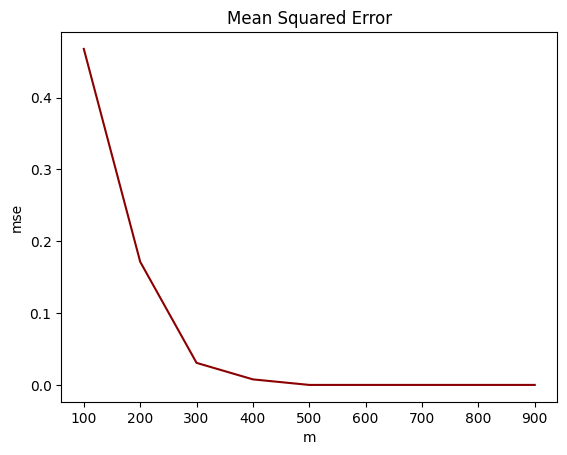

10: mse = 0.6595994322461797
100: mse = 0.4676064733930895
1000: mse = 1.6772467037170002e-29
10000: mse = 1.6147340633788466e-29


In [29]:
n = 215
m_values = range(100, 1000, 100)

mse = []
for m in m_values:
    X, y = get_data(n, m)
    model = LinearRegression()
    model.fit(X, y)
    mse.append(mean_squared_error(model.predict(X), y))

plt.plot(m_values, mse, color="darkred")
plt.title("Mean Squared Error")
plt.xlabel("m")
plt.ylabel("mse")
plt.show()

mse = []
for m in [10, 100, 1000, 10000]:
    X, y = get_data(n, m)
    model = LinearRegression()
    model.fit(X, y)
    mse.append(mean_squared_error(model.predict(X), y))
print(f"10: mse = {mse[0]}")
print(f"100: mse = {mse[1]}")
print(f"1000: mse = {mse[2]}")
print(f"10000: mse = {mse[3]}")

In [30]:
n = 215
m_values = [10, 100, 200, 500, 1000, 10000]

for m in m_values:
    X, y = get_data(n, m)
    train_X, test_X = X[:200], X[200:]
    train_y, test_y = y[:200], y[200:]
    model = LinearRegression()
    # model = Ridge(alpha=1.0)
    model.fit(train_X, train_y)
    print(f"m = {m}:")
    print("cond train:", la.cond(train_X))
    labels = test_y
    preds = model.predict(test_X)
    print("\tlabel vs pred:", end="")
    for i in range(15):
        if i % 5 == 0:
            print("\n\t\t", end="")
        print(f"{labels[i]} vs {preds[i]:.3f}", end="\t")
    print(f"\ntrain mse: {mean_squared_error(model.predict(train_X), train_y)}")
    print(f"test mse: {mean_squared_error(preds, labels)}")
    print("----------------------------")

m = 10:
cond train: 21.493921605240345
	label vs pred:
		5.0 vs 3.858	4.0 vs 4.074	4.0 vs 3.858	4.0 vs 3.890	3.0 vs 4.033	
		2.5 vs 4.871	4.0 vs 3.858	4.0 vs 3.704	3.0 vs 4.027	4.0 vs 3.812	
		2.5 vs 3.843	4.0 vs 3.858	2.5 vs 4.017	3.0 vs 4.063	5.0 vs 3.666	
train mse: 0.6403297995793991
test mse: 1.084267516218346
----------------------------
m = 100:
cond train: 1.907006626727494e+50
	label vs pred:
		5.0 vs 5.029	4.0 vs 4.669	4.0 vs 5.011	4.0 vs 3.659	3.0 vs 2.281	
		2.5 vs 4.475	4.0 vs 3.792	4.0 vs 0.754	3.0 vs 10.322	4.0 vs 2.088	
		2.5 vs 5.935	4.0 vs 4.470	2.5 vs 4.917	3.0 vs 4.003	5.0 vs 3.545	
train mse: 0.44268104101313904
test mse: 6.321795179049663
----------------------------
m = 200:
cond train: inf
	label vs pred:
		5.0 vs 2.279	4.0 vs 4.991	4.0 vs 4.061	4.0 vs 2.935	3.0 vs 5768907649061.731	
		2.5 vs 2926102687165.421	4.0 vs 3.703	4.0 vs -45226331418332.766	3.0 vs -29487804476132.324	4.0 vs 3.000	
		2.5 vs 14561999368557.150	4.0 vs 13.677	2.5 vs 9.086	3.0 vs -1870944701

Write a movie recommendation system. Such systems are used by various companies, for example, Netflix organized a competition to develop an algorithm that would predict user ratings [Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize). In this task, we will implement a similar system, but instead of predicting ratings, it will recommend movies that the user is most likely to enjoy based on their preferences.

There are many ways to write such a system. For those interested in more details, consider looking at [Recommendation Systems](http://infolab.stanford.edu/~ullman/mmds/ch9.pdf). In this task, we will choose a relatively simple and easy-to-implement recommendation system.

Let's formalize the problem. Assume we have a rating matrix where rows represent users and columns represent movies, e.g.,

$$
\begin{array}{ccc}
    & \text{Matrix} & \text{Star Wars IV} \\
    \text{Alice} & 5 & 4 \\
    \text{Bob} & 0 & 1 \\
    \text{John} & 2 & 2 \\
    \text{Ada} & 5 & 5
\end{array}
$$

Looking at the above matrix, it is clear that the first and second columns have similar ratings. Hence, one can infer that the movies Matrix and Star Wars IV are (according to users) similar to each other. Therefore, if someone liked the Matrix, there is a good chance they will also like Star Wars and vice versa. We will formalize "similarity" by using [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity), which means if $x = (x_1, x_2, \dots, x_n)$ and $y = (y_1, y_2, \dots, y_n)$, then:

$$
x_1 y_1 + x_2 y_2 + \cdots + x_n y_n = x \cdot y = \lVert x \rVert \lVert y \rVert \cos(\theta).
$$

Where $\theta$ is the angle between the vectors. It is more convenient to normalize the vectors. Then,

$$
x_1 y_1 + x_2 y_2 + \cdots + x_n y_n = \cos(\theta).
$$ 

Thus, $\cos(\theta)$ represents the similarity of one vector to another, i.e., how close one set of ratings is to another.

For our matrix, we get:

In [31]:
import numpy as np

In [32]:
x = np.array([[5,0,2,5], [4,1,2,5]]).T
x

array([[5, 4],
       [0, 1],
       [2, 2],
       [5, 5]])

In [33]:
np.linalg.norm(x, axis=0)

array([7.34846923, 6.78232998])

In [34]:
x/np.linalg.norm(x, axis=0)

array([[0.68041382, 0.58976782],
       [0.        , 0.14744196],
       [0.27216553, 0.29488391],
       [0.68041382, 0.73720978]])

In [35]:
y = [[4],[3]]
y

[[4], [3]]

We calculate the cosine similarity with each user (we will use matrix multiplication)

In [36]:
z=np.dot(x/np.linalg.norm(x, axis=0), np.array(y)/np.linalg.norm(y))
z

array([[0.89819175],
       [0.08846517],
       [0.39466277],
       [0.98665692]])

In [37]:
z/np.linalg.norm(z)

array([[0.64422929],
       [0.06345177],
       [0.28307243],
       [0.70768107]])

Now we need to calculate the cosine similarity between our profile and each column of the matrix to find such movies that are similar to our profile. We sort by the similarity obtained and get the recommendations. Using our example, we get


In [38]:
X = x/np.linalg.norm(x, axis=0)
Z = z/np.linalg.norm(z)
np.dot(X.T, Z)

array([[0.99690104],
       [0.99448407]])

Hence, we received a higher recommendation for the movie Matrix (0.996) than for Star Wars IV (0.994). This was, of course, expected since our rating was Matrix - 4, and Star Wars IV - 3.

We can now move on to the main part of the task.

#### Task to be completed

Write a movie recommendation system that will use the data from the [MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/). Specifically, we will use a smaller dataset (which we will further reduce). Download the file [ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip). We will mainly be interested in two files: movies.csv and ratings.csv. In the ratings.csv file, we have essentially all the data needed to create a rating matrix. Even in this case, the resulting matrix will be quite large, so when loading data from the file, please consider only those rows (from ratings.csv) where <b>movie_id</b> (second column) is less than 10000 (ignore the rest). For the current data from the website, we will then get a matrix of approximately 611x9019.

An example result for a selected movie profile:

```python
# the vector my_ratings corresponds to the y vector from the example above
my_ratings = np.zeros((9019,1))
my_ratings[2571] = 5      # see movies.csv  2571 - Matrix
my_ratings[32] = 4        # 32 - Twelve Monkeys
my_ratings[260] = 5       # 260 - Star Wars IV
my_ratings[1097] = 4
my_ratings_norm = my_ratings/np.linalg.norm(my_ratings)

...

# we get the recommendation result after sorting
# (cos(θ), movies_id)
(0.8675507828468105, 260)
(0.8362098349303669, 2571)
(0.8227451213877744, 1196)
(0.8002349214247857, 1210)
(0.7458504689612442, 1097)
(0.7286029159733108, 32)
(0.7265369898748615, 1198)
(0.7095672455110477, 1240)
(0.7029872178855614, 1270)
```

Display the obtained recommendations as movie names using movies.csv. Note: in real data, we will get a large number of zeros, even entire columns, which will result in NaN values when dividing! Solve this problem using, for example, np.nan_to_num(...).

In [39]:
movies = pd.read_csv("datasets/ml-latest-small/movies.csv")
ratings = pd.read_csv("datasets/ml-latest-small/ratings.csv")

ratings = ratings[ratings["movieId"] < 10000]

display(movies.head())
print(len(movies))
display(ratings.head())
print(len(ratings))

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


9742


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


77939


In [40]:
n = len(set(ratings["userId"]))
m = max(ratings["movieId"])

movie_indices = set(ratings["movieId"])

print(f"n = {n}, m = {m}")

n = 610, m = 9018


In [41]:
X = np.zeros((n, m))

for user in set(ratings["userId"]):
    mr_pairs = ratings[ratings["userId"] == user].sort_values("movieId")[["movieId", "rating"]]
    for movie, rating in mr_pairs.values:
        X[user-1, int(movie)-1] = rating

In [42]:
def find_movies(profile):
    eps = 1e-10
    X_norm = X / (np.linalg.norm(X, axis=0) + eps)
    profile_norm = profile / np.linalg.norm(profile)
    z = np.dot(X_norm, profile_norm)
    z = z / np.linalg.norm(z)
    return np.dot(X_norm.T, z)

In [43]:
my_ratings = np.zeros((9018,1))
my_ratings[2570] = 5      # patrz movies.csv  2571 - Matrix
my_ratings[31] = 4        # 32 - Twelve Monkeys
my_ratings[259] = 5       # 260 - Star Wars IV
my_ratings[1096] = 4

result = find_movies(my_ratings)
recommendations = [(result[i-1][0], i, movies[movies["movieId"] == i]["title"].values[0]) for i in movie_indices]

In [46]:
recommendations = sorted(recommendations, key=lambda triplet: triplet[0], reverse=True)
recommendations = pd.DataFrame(recommendations, columns=["cos", "movieId", "title"])
recommendations.head(10)

,cos,movieId,title
0,0.867551,260,Star Wars: Episode IV - A New Hope (1977)
1,0.836210,2571,"Matrix, The (1999)"
2,0.822745,1196,Star Wars: Episode V - The Empire Strikes Back...
3,0.800235,1210,Star Wars: Episode VI - Return of the Jedi (1983)
4,0.745850,1097,E.T. the Extra-Terrestrial (1982)
5,0.728603,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
6,0.726537,1198,Raiders of the Lost Ark (Indiana Jones and the...
7,0.709567,1240,"Terminator, The (1984)"
8,0.702987,1270,Back to the Future (1985)
9,0.698149,1291,Indiana Jones and the Last Crusade (1989)
